In [1]:
import json
import os

import importlib
import pandas as pd
import pyperclip as clip

import Functions as F

In [2]:
importlib.reload(F)
# get the latest data
JS = F.JokeStory('joke_data2.json') # joke_data.json -> finish until 130 (start from 131)
if len(JS.story.dropna()) > 0:
    # get the latest 10 aggregated data
    data = pd.merge(JS.joke, JS.story, how='right', on='id')
else:
    data = JS.joke

data.dropna().tail(1)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=260967290589-b75u6164vnmki0764bf4og1hhrrqn27b.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A50405%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocuments+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.file+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.upload+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.force-ssl&state=hXUVbF9O13XQoszzCPv13twA9Hsaf3&access_type=offline


id                                               joke   origin_id  \
9  1089  My sister bet me $15 that I couldn't build a c...  6MCYoGB5Tf   

   culture        category                                        description  \
9  General  icanhazdadjoke  Play on words with 'drove pasta' sounding like...   

       title c1_name c2_name c1_gender  ...                    c1_2  \
9  Pasta Car    Alex  Sister      male  ...  Just wait, you’ll see.   

                     c2_2                              n_3  \
9  It’s just pasta, Alex.  Alex revs up the spaghetti car.   

                      c1_3                 c2_3  \
9  Ready for a test drive!  This I have to see.   

                                               n_4  \
9  Alex zooms by in his pasta car, sister stunned.   

                            c1_4                      c2_4  \
9  Told you I could drive pasta!  I can’t believe my eyes!   

                                         script_flow          image_id  
9  [n_1, c1_1, c2_1, n_2, c1_2, c2_2, n_3, c1_3, ...  P2bl6nBFhdZkKfmh  

[1 rows x 25 columns]

### Code 101&102: Generate Story and Images

In [69]:
### Story Prompts
p1 = F.prompt1(JS.get_next_joke())
print(JS.get_next_joke())
# copy prompt to clipboard
clip.copy(p1)

My sister bet me $15 that I couldn't build a car out of spaghetti. You should have seen the look on her face as I drove pasta.


In [70]:
### Image Prompts
p2 = F.prompt2()
# copy prompt to clipboard
clip.copy(p2)

In [71]:
### Update Story Data
with open('story_script.json', 'r', encoding='utf-8') as f:
    story_script = json.load(f)
# update data
story = JS.save_story_data(story_script)
# rename, relocate, and convert to png format
result = JS.image_preprocess()
if result['status'] == 'success':
    # create a new google docs
    doc_id = JS.google.create_docs(result['message'])
    print(doc_id)
else:
    print(result['message'])

Success: Story Data Updated
Success: Image Preprocessing
Success: New Docs Created
{'1089_PastaCar': '18BzMSV7z06PCvnYouRP7pVlAO_3pzVndxPG3EnWy6mc'}


### Code 104: SNS Messages

In [76]:
JS.story.tail(8)

description             title  \
10        Pun on addiction to soap and being 'clean'.         Soap Saga   
11        Pun on addiction to soap and being 'clean'.         Soap Saga   
12  Classic play on words with 'ajar' sounding lik...      Door Dilemma   
13           Pun on 'waist of time' and wasting time.         Time Belt   
14  Humorous misunderstanding between 'Bach' and c...  Musical Chickens   
15  Wordplay on 'one night stand' as both furnitur...   Unwanted Emails   
16  Play on words linking 'fresh prints' to 'Fresh...      Snowy Search   
17  Play on words with 'drove pasta' sounding like...         Pasta Car   

   c1_name      c2_name c1_gender c2_gender  \
10     Sam          Lee      male      male   
11     Sam          Lee      male      male   
12     Tom        Jerry      male      male   
13     Max          Ben      male      male   
14  Mozart     Chickens      male      male   
15    Alex  Store Clerk      male    female   
16    Will          Fan      male    female   
17    Alex       Sister      male    female   

                                                  n_1  \
10   Sam shares a quirky confession with Lee at home.   
11   Sam shares a quirky confession with Lee at home.   
12                   Tom struggles to close the door.   
13                 Max shows off his new belt to Ben.   
14  Mozart queries his flock of chickens about the...   
15  Alex browses furniture when the store clerk ap...   
16              Fan spots Will Smith in a snowy park.   
17         Alex works on something odd in the garage.   

                                   c1_1  \
10         I was really into soap once.   
11         I was really into soap once.   
12          This door won't shut tight!   
13               Check out my new belt!   
14         Who's the greatest composer?   
15  I'm just looking for a night stand.   
16       Is that Will Smith over there?   
17         Almost done with my project!   

                                      c2_1  \
10                   Soap? That’s unusual!   
11                   Soap? That’s unusual!   
12                     Let me have a look.   
13                      That’s... unusual.   
14                       Bach, Bach, Bach!   
15  Sure, I’ll sign you up for our offers!   
16                 Where? I can’t see him!   
17             That’s never going to work.   

                                                  n_2  ...  \
10   Lee raises an eyebrow, curious about Sam's past.  ...   
11   Lee raises an eyebrow, curious about Sam's past.  ...   
12                   Jerry inspects the door closely.  ...   
13   Ben looks confused at the collection of watches.  ...   
14        Mozart looks confused and slightly annoyed.  ...   
15  Alex looks confused as the clerk types on a co...  ...   
16      Fan squints, trying to find Will in the snow.  ...   
17  Sister skeptically watches Alex fiddle with sp...  ...   

                                             c2_2  \
10                           Sounds... intensive.   
11                           Sounds... intensive.   
12                      Hmm, it seems fine to me.   
13                        Does it tell time well?   
14                              Bach, Bach, Bach!   
15  Don’t worry, you’ll get all the latest deals!   
16              Those are just normal footprints.   
17                         It’s just pasta, Alex.   

                                                  n_3  \
10       Sam nods seriously, recalling his obsession.   
11       Sam nods seriously, recalling his obsession.   
12             Tom points out the issue more clearly.   
13              Max grins proudly, spinning his belt.   
14  Mozart's frustration grows as he holds a music...   
15      Alex receives a flood of emails on his phone.   
16                   Will appears, waving at the fan.   
17                    Alex revs up the spaghetti car.   

                                   c1_3  \
10             It was a real ad

In [78]:
# Get the list of documentId; return {"id_title": "documentId"}
doc_ids = dict(sorted(JS.google.list_docs().items()))

F.prompt3(doc_ids)

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1080_Cow'sDilemma.json' and branch: 'main'
  - documentId: 1eiyVNtBJBzO7XFcYhFtBAFdXg7TiR49cW0zzhcGtKF0
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1081_TomatoRace.json' and branch: 'main'
  - documentId: 13ektKvM_Tryb5b9O-HHwUz7gCInyE-oCojlQbN0ueq0
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file. Activate code '104':
  - path: 'Stories/1082_CleverThief.json' and branch: 'main'
  - documentId: 1eVYAf0bffTMVWyA5R-eQfT88LG0PqRKQuPUepASCzws
  - Precisely follow the steps 1,2,3,4 outlined in 'actions' component.
  - Make sure to convert texts to the JSON formatting and add location index as 1

Follow the knowledge file

x

### Video Creation

In [3]:
importlib.reload(F)
# Create video class object
video = F.Video(JS)
# Define ids of video to be generated
id_list = [i for i in range(1080, 1090)] 
# generate expected crop mode (change 'manual' if necessary after observing image cropping test)
exp_crop_mode = str({id_: 'auto' for id_ in id_list})
clip.copy(exp_crop_mode)

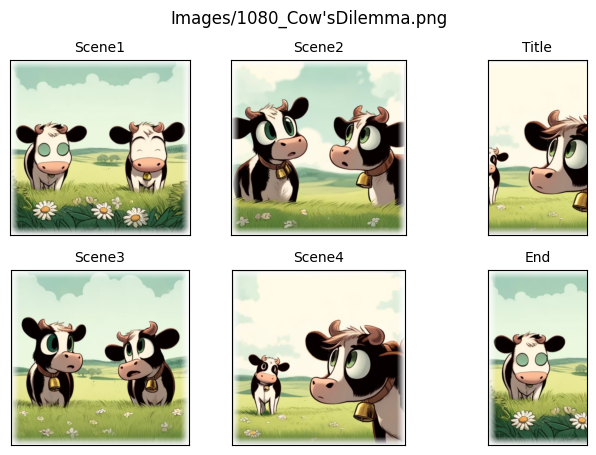

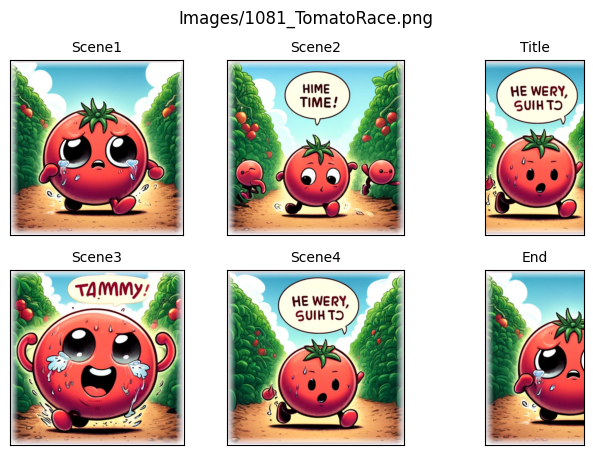

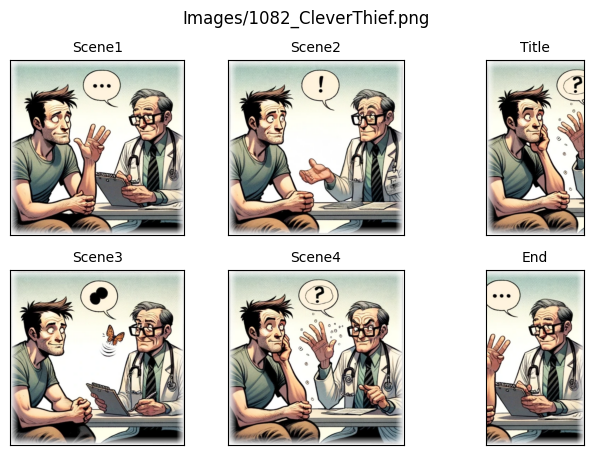

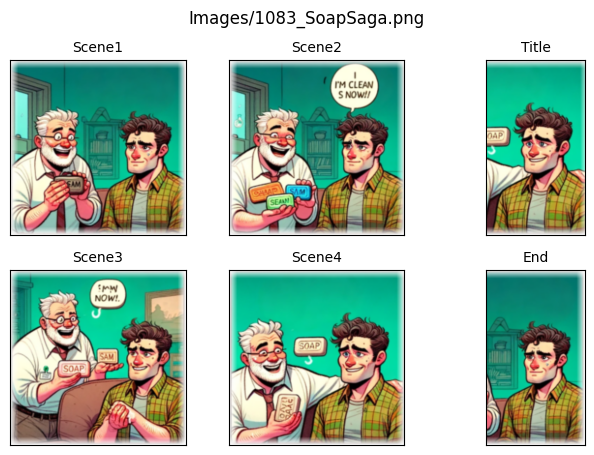

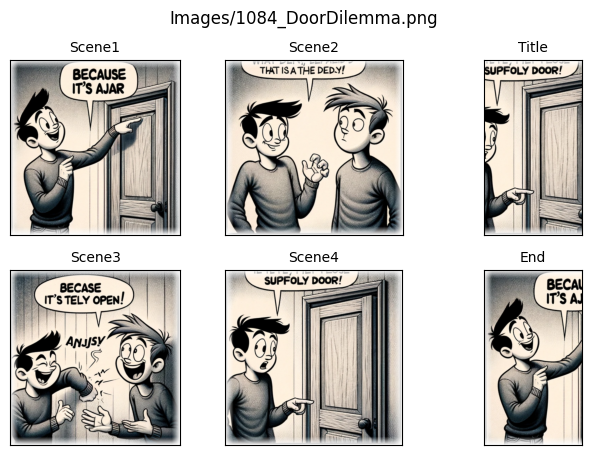

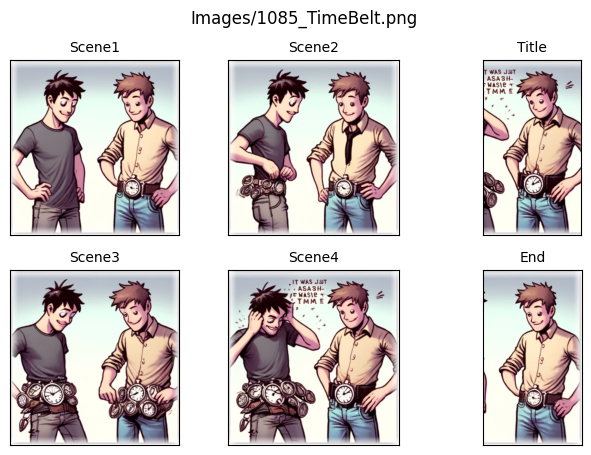

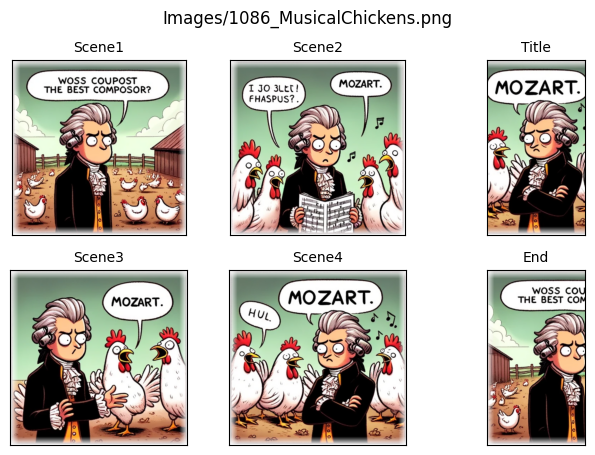

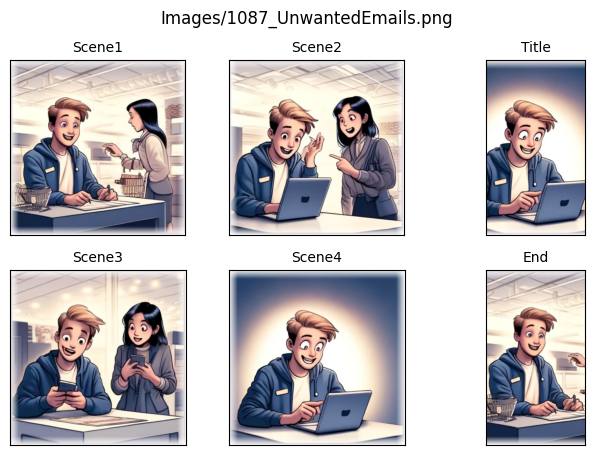

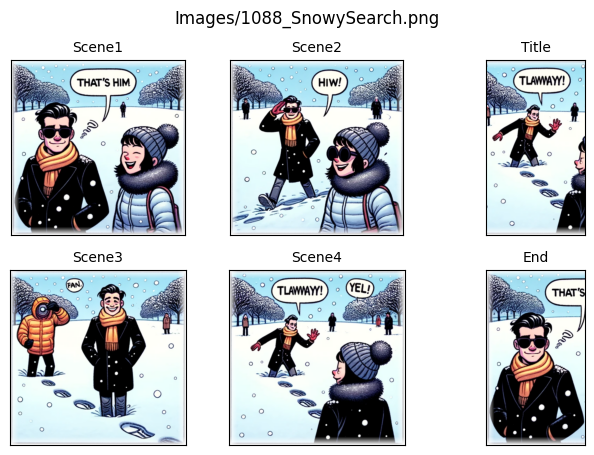

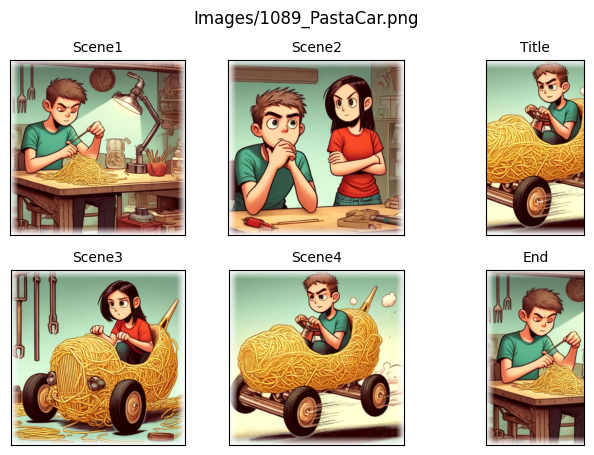

In [4]:
# Get list of image paths
img_path = [f"Images/{p}" for p in os.listdir('Images') if int(p.split('_')[0]) in id_list]

# Test image cropping
video.image_crop_test(img_path)

In [5]:
# confirmation
confirm = input("Did you check the four-panel image and 'crop_image'? If so answer 'y'.")

# copy the crop mode dictionary here
crop_mode = crop_mode = {1080: 'auto', 1081: 'auto', 1082: 'auto', 1083: 'auto', 1084: 'auto', 1085: 'auto', 1086: 'auto', 1087: 'auto', 1088: 'auto', 1089: 'auto'}

if confirm == 'y':
    video_names = video.generate_video(id_list=id_list, t_interval = 60, crop_mode=crop_mode) 
    # successfully generated video names
print(video_names)

Moviepy - Building video Videos/1080_Cow'sDilemma.mp4.
MoviePy - Writing audio in 1080_Cow'sDilemmaTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1080_Cow'sDilemma.mp4



Moviepy - Done !
Moviepy - video ready Videos/1080_Cow'sDilemma.mp4
Moviepy - Building video Videos/1081_TomatoRace.mp4.
MoviePy - Writing audio in 1081_TomatoRaceTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1081_TomatoRace.mp4



Moviepy - Done !
Moviepy - video ready Videos/1081_TomatoRace.mp4
Moviepy - Building video Videos/1082_CleverThief.mp4.
MoviePy - Writing audio in 1082_CleverThiefTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1082_CleverThief.mp4



Moviepy - Done !
Moviepy - video ready Videos/1082_CleverThief.mp4
Moviepy - Building video Videos/1083_SoapSaga.mp4.
MoviePy - Writing audio in 1083_SoapSagaTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1083_SoapSaga.mp4



Moviepy - Done !
Moviepy - video ready Videos/1083_SoapSaga.mp4
Moviepy - Building video Videos/1084_DoorDilemma.mp4.
MoviePy - Writing audio in 1084_DoorDilemmaTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1084_DoorDilemma.mp4



Moviepy - Done !
Moviepy - video ready Videos/1084_DoorDilemma.mp4
Moviepy - Building video Videos/1085_TimeBelt.mp4.
MoviePy - Writing audio in 1085_TimeBeltTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1085_TimeBelt.mp4



Moviepy - Done !
Moviepy - video ready Videos/1085_TimeBelt.mp4
Moviepy - Building video Videos/1086_MusicalChickens.mp4.
MoviePy - Writing audio in 1086_MusicalChickensTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1086_MusicalChickens.mp4



Moviepy - Done !
Moviepy - video ready Videos/1086_MusicalChickens.mp4
Moviepy - Building video Videos/1087_UnwantedEmails.mp4.
MoviePy - Writing audio in 1087_UnwantedEmailsTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1087_UnwantedEmails.mp4



Moviepy - Done !
Moviepy - video ready Videos/1087_UnwantedEmails.mp4
Moviepy - Building video Videos/1088_SnowySearch.mp4.
MoviePy - Writing audio in 1088_SnowySearchTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1088_SnowySearch.mp4



Moviepy - Done !
Moviepy - video ready Videos/1088_SnowySearch.mp4
Moviepy - Building video Videos/1089_PastaCar.mp4.
MoviePy - Writing audio in 1089_PastaCarTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video Videos/1089_PastaCar.mp4



Moviepy - Done !
Moviepy - video ready Videos/1089_PastaCar.mp4
["1080_Cow'sDilemma", '1081_TomatoRace', '1082_CleverThief', '1083_SoapSaga', '1084_DoorDilemma', '1085_TimeBelt', '1086_MusicalChickens', '1087_UnwantedEmails', '1088_SnowySearch', '1089_PastaCar']


### Video Schedule Post

In [3]:
import re
def camel_to_normal(text):
    # Split on all non-initial capital letters or non-letter characters that are followed by a capital letter
    split_text = re.sub('([a-z0-9])([A-Z])', r'\1 \2', text)
    return split_text

In [7]:
# list docs of video description
v_docs = JS.google.list_docs()
# get the publish time
current_schedule = JS.google.get_scheduled_videos()
new_schedule = JS.google.get_new_schedules(list(current_schedule), num_videos=len(v_docs))

v_titles, v_contents, v_tags, v_paths, v_schedules = [], [], [], [], []
# traverse all docs
for i, (id_title, docs_id) in enumerate(v_docs.items()):
    # title
    v_titles.append(f"Joke Story: {camel_to_normal(id_title.split('_')[1])}")
    # content
    v_contents.append(JS.google.get_doc_content(docs_id))
    # tags
    v_tags.append({}) 
    # path
    v_paths.append(f"Videos/{id_title}.mp4")
    # scheduled time
    v_schedules.append(new_schedule[i])

# final check of the video schedule
pd.DataFrame({
    'Title': v_titles,
    'Content': v_contents[:20], # first 20 characters
    #'Tags': v_tags,
    'Path': v_paths,
    'Schedule': v_schedules
})

Success: No scheduled videos are found


Title  \
0     Joke Story: Cow's Dilemma   
1       Joke Story: Tomato Race   
2      Joke Story: Clever Thief   
3         Joke Story: Soap Saga   
4      Joke Story: Door Dilemma   
5         Joke Story: Time Belt   
6  Joke Story: Musical Chickens   
7   Joke Story: Unwanted Emails   
8      Joke Story: Snowy Search   
9         Joke Story: Pasta Car   

                                             Content  \
0  🐄🧀 Dive into "Cow's Dilemma," where dairy puns...   
1  🍅🏁 Dive into "Tomato Race," a playful tale of ...   
2  🎩🔓 Dive into "Clever Thief," a witty play on k...   
3  🧼🚿 Dive into "Soap Saga," where addiction to s...   
4  🚪🔧 Dive into "Door Dilemma," a playful twist o...   
5  ⏱️🛠️ Dive into "Time Belt," where timekeeping ...   
6  🎵🐔 Dive into "Musical Chickens," where a class...   
7  📧🛏️ Dive into "Unwanted Emails," a comedic mix...   
8  ❄️🔍 Dive into "Snowy Search," a playful misadv...   
9  🚗🍝 Dive into "Pasta Car," where automotive dre...   

                              Path              Schedule  
0     Videos/1080_Cow'sDilemma.mp4  2024-05-13T12:00:00Z  
1       Videos/1081_TomatoRace.mp4  2024-05-13T13:00:00Z  
2      Videos/1082_CleverThief.mp4  2024-05-14T12:00:00Z  
3         Videos/1083_SoapSaga.mp4  2024-05-14T13:00:00Z  
4      Videos/1084_DoorDilemma.mp4  2024-05-15T12:00:00Z  
5         Videos/1085_TimeBelt.mp4  2024-05-15T13:00:00Z  
6  Videos/1086_MusicalChickens.mp4  2024-05-16T12:00:00Z  
7   Videos/1087_UnwantedEmails.mp4  2024-05-16T13:00:00Z  
8      Videos/1088_SnowySearch.mp4  2024-05-17T12:00:00Z  
9         Videos/1089_PastaCar.mp4  2024-05-17T13:00:00Z

In [5]:
# post_video
import time
for i in range(len(v_titles)):
    result = JS.google.post_video(v_titles[i], v_contents[i], v_tags[i], v_paths[i], v_schedules[i])
    print(result)
    time.sleep(5)

{'status': 'success', 'videoId': 'GihAsjQvwQE'}
{'status': 'success', 'videoId': 'aUc-SvO2rTQ'}
{'status': 'success', 'videoId': 'xGFJecdp1b4'}
{'status': 'success', 'videoId': '9DhHkeo6KQQ'}


In [9]:
# if the quote reaches to the maximum in YouTube Data API
#  copy and paste, then execute the above cell again.
start_idx = 6
print(f"""
v_titles = {v_titles[start_idx:]}
v_contents = {v_contents[start_idx:]}
v_tags = {v_tags[start_idx:]}
v_paths = {v_paths[start_idx:]}
v_schedules = {v_schedules[start_idx:]}
""")


v_titles = ['Joke Story: Musical Chickens', 'Joke Story: Unwanted Emails', 'Joke Story: Snowy Search', 'Joke Story: Pasta Car']
v_contents = ['🎵🐔 Dive into "Musical Chickens," where a classical query turns into a humorous poultry pun! 🎶 Mozart asks his flock of chickens about the greatest composer, \'Who\'s the greatest composer?\' The chickens respond in unison, \'Bach, Bach, Bach!\' Mozart, confused and slightly annoyed, repeats, \'Seriously? Again?\' The chickens insist, \'Bach, Bach, Bach!\' As Mozart holds a musical score, his frustration grows, \'Can\'t you say anything else?\' Yet again, the chickens reply, \'Bach, Bach, Bach!\' Mozart facepalms, realizing the pun, \'I can\'t win with you!\' This playful exchange turns a simple question about composers into a pun-filled scenario, highlighting the sound chickens make with the name of the famous composer Bach. #ClassicalPuns #ComposerJokes #ChickenHumor #MusicPuns #FarmyardFun\n\n🏫 English Explanation 🗣️:\n1. **Classical query**:

### Code 100: Generate Jokes

#### Joke Prompts

In [3]:
JS.joke_prompts(culture_opt='General', category_opt='Valentine', number=10)

Activate 'Code 100'.
Return only code snippet of CSV format.
Make sure that each row of output data has three values; culture(str), category(str), and the generated joke(str).
Retrieve the existing jokes without **decoding** and **analyzing** them, and make sure no duplicated sentence of jokes.

Here is the list of prompts; generate a creative and unique joke per prompts.
["Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Valentine' category.", "Generate a creative and unique joke based on 'General' culture and 'Val

#### Update Joke Data

In [ ]:
# update data
raw_csv = """

"""

joke = JS.update_joke_data(raw_csv)
joke.tail()

id  culture   category  \
185  185  General  Valentine   
186  186  General  Valentine   
187  187  General  Valentine   
188  188  General  Valentine   
189  189  General  Valentine   

                                                  joke  
185  What's a chocolate's favorite kind of music on...  
186  Why was the chocolate box nervous on Valentine...  
187  How do chocolates stay fit for Valentine's Day...  
188  What did the chocolate say to the Valentine's ...  
189  Why did the chocolate give his girlfriend a bo...

In [14]:
joke = pd.read_json('joke_data.json')
joke['id'] = [i for i in range(len(joke))]
joke.tail()

id  culture             category  \
157  157  General  Observational humor   
158  158  General       Wordplay jokes   
159  159  General         Animal jokes   
160  160  General         Doctor jokes   
161  161  General     Technology jokes   

                                                  joke  
157  Isn't it funny how we never see snowmen at the...  
158  If April showers bring May flowers, what do Ma...  
159  Why don’t polar bears get married in winter? B...  
160  Why do doctors make the worst snowmen? Because...  
161  Why did the smartphone wear a scarf? Because i...

In [15]:
joke.to_json('joke_data.json', orient='records', indent=4)

### Code 103: Images for Title and End

In [ ]:
story = JS.story.dropna().iloc[-1]
joke_id = f"{story['id']:03d}"
img_title = f"{story['title'].replace(' ', '')}"
outputs = [f"{joke_id}_{img_title}", f"{joke_id}_title.png", f"{joke_id}_end.png"]

# get the path to the story script
path = f"Stories/{joke_id}_{img_title}.json"
#img_params = {"size": "1024x1792", "quality": "hd"}
print(f"""Activate Code '103':
- Image must be "1024x1792" size without any words.
- Two images must be suitable to the story of {story['title']} that we are focusing on; please referring to the latest story scripts.
- Precisely follow the four steps outlined in "actions" component.""")
outputs